In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

# 1.Data Preprocessing:


In [5]:
df = pd. read_csv("anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
df.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [8]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [9]:
df.shape

(12294, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [11]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
df['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [13]:
df['rating'].value_counts()

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [14]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [15]:
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['genre'].fillna('Unknown', inplace=True)
df['type'].fillna('Unknown', inplace=True)

In [16]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [17]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: count, dtype: int64

<Axes: xlabel='type'>

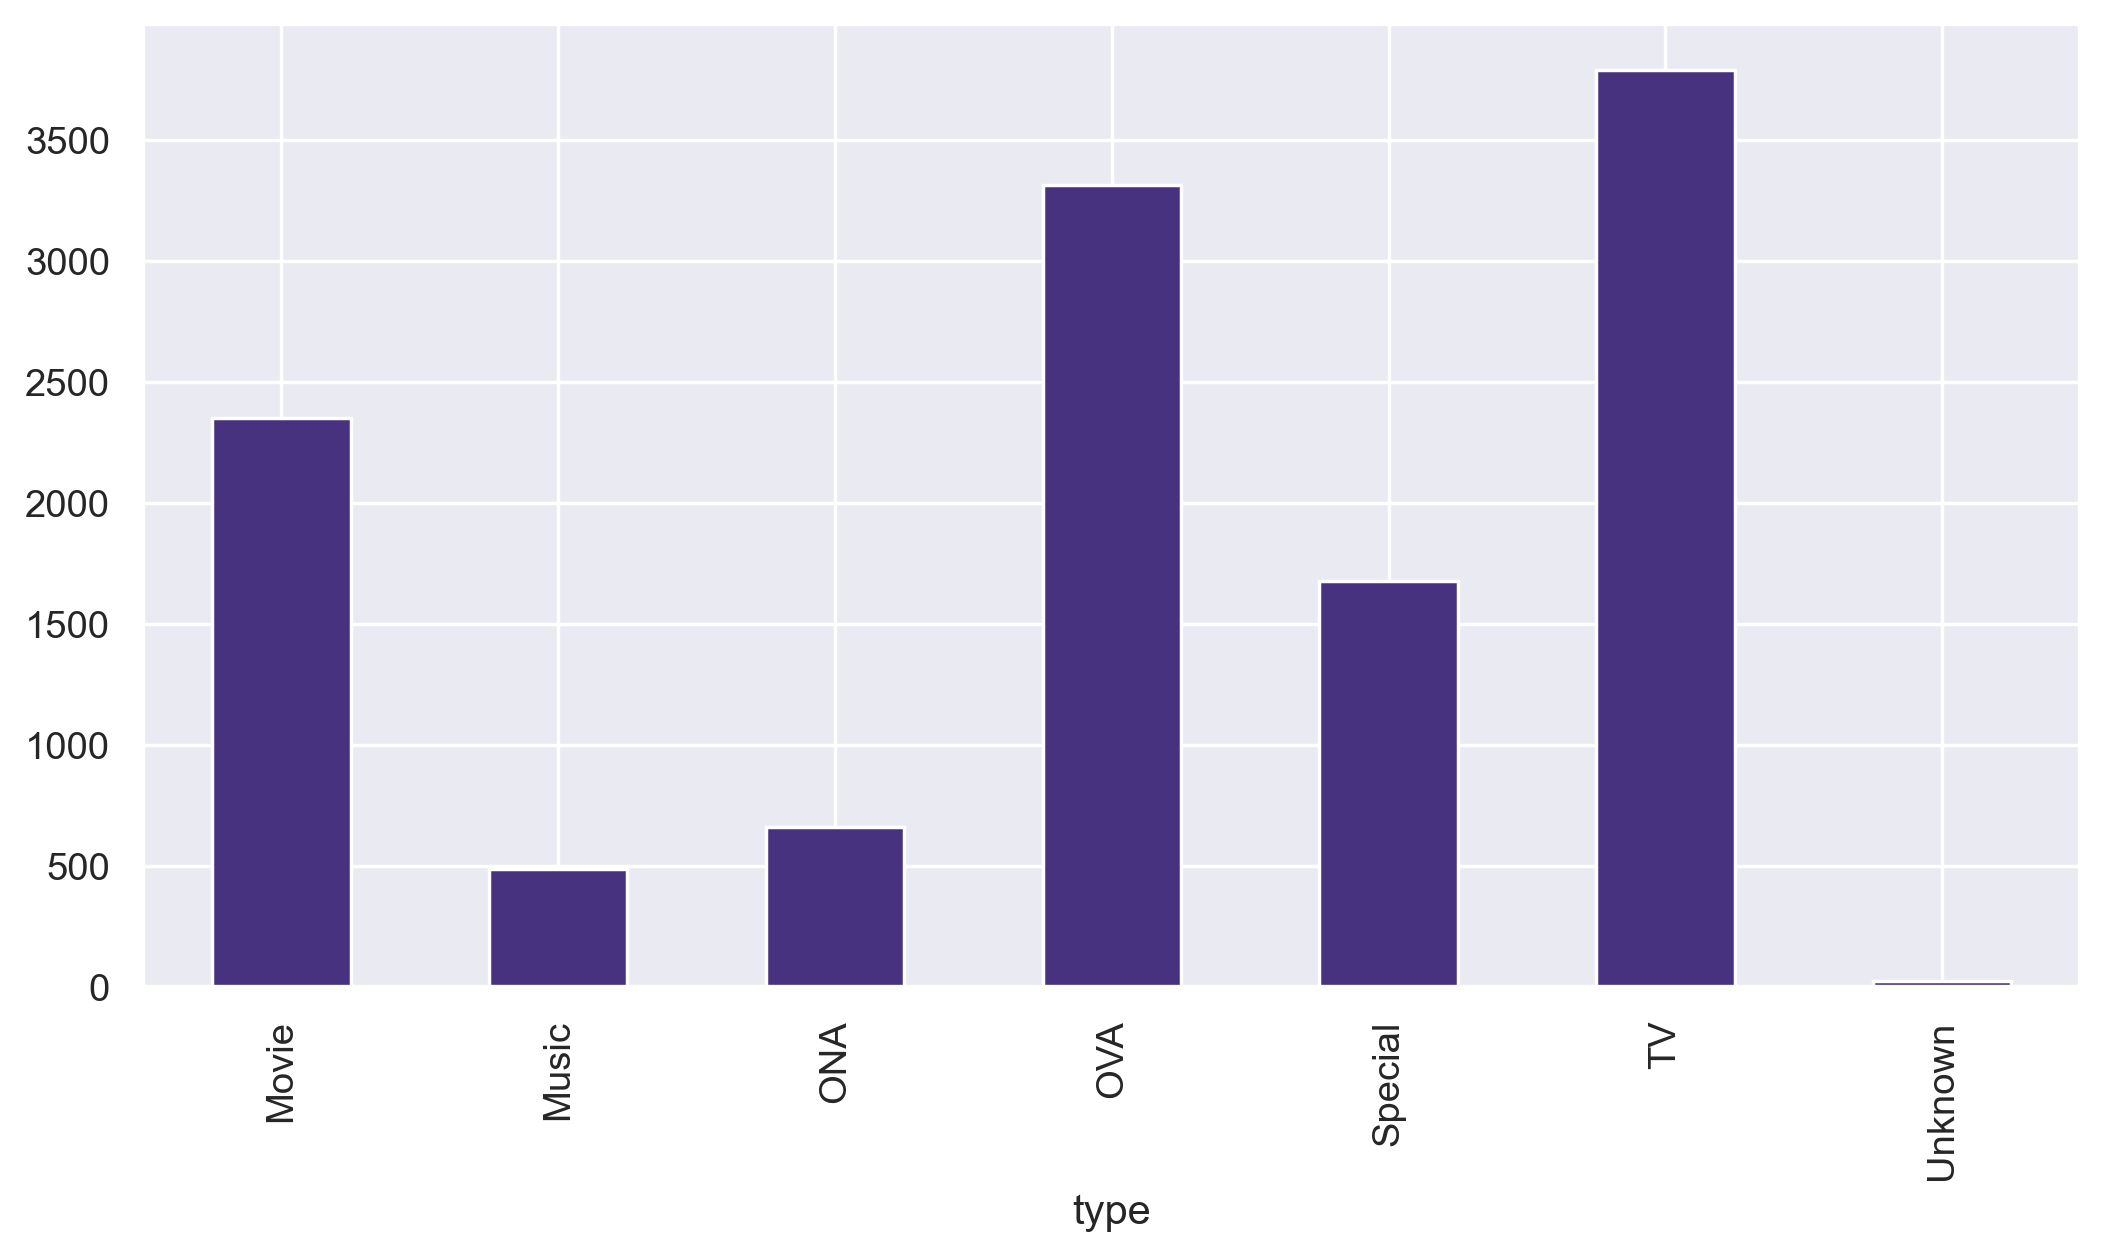

In [18]:
df['type'].value_counts().sort_index().plot(kind='bar')


In [19]:
# 2.Feature Extraction:

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler

In [21]:
gerne_enco = df['genre'].str.get_dummies(sep=',')

scal = StandardScaler()
norm_rating = scal.fit_transform(df[['rating']])

# combine into a single DataFrame
feature = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])])
feature.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,norm_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [22]:
genre_enco =df['genre'].str.get_dummies(sep=',')

In [23]:
# normalising of rating.
scal = StandardScaler()
norm_rating = scal.fit_transform(df[['rating']])

In [24]:
# combining freature
feature = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])],axis=1)

In [25]:
# computing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(feature)

In [26]:
# 3.Recommendation System:

In [27]:
# Normalize 'rating'
scaler = MinMaxScaler()
df['rating_normalized'] = scaler.fit_transform(df[['rating']])
type = pd.get_dummies(d[[""]])

In [28]:
features = df[['rating_normalized', 'type', 'genre']]

In [29]:
# Prepare the feature matrix
features = ['rating_normalized', 'type'] + list(features .columns)
X = df[features]

In [31]:
# Recommendation Function
def recommend_anime(anime_title, similarity_matrix, data, top_n=10):
    anime_idx = data[data['name'] == anime_title].index[0]
    similarity_scores = list(enumerate(similarity_matrix[anime_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_anime_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    return data['name'].iloc[similar_anime_indices]

In [32]:
call = recommend_anime("Gintama°", similarity_matrix, df, top_n=5)
print("recommedation for 'Gintama°': ")
print(call)

recommedation for 'Gintama°': 
4                                         Gintama&#039;
9                              Gintama&#039;: Enchousen
8     Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
12                                              Gintama
63          Gintama: Yorinuki Gintama-san on Theater 2D
Name: name, dtype: object


In [33]:
call = recommend_anime("Under World", similarity_matrix, df, top_n=5)
print("recommedation for 'Under World': ")
print(call)

recommedation for 'Under World': 
12287                          Tenshi no Habataki Jun
12288                                The Satisfaction
12260                         Hokenshitsu de Aimashou
12289    Toushindai My Lover: Minami tai Mecha-Minami
12267                                   Lovely Series
Name: name, dtype: object


# 1. Can you explain the difference between User-Based and Item-Based Collaborative Filtering?

User-Based Collaborative Filtering recommends items to a user based on the preferences of similar users. It identifies users with similar tastes or behaviors and suggests items liked by these users.
Item-Based Collaborative Filtering recommends items by analyzing the similarity between items. It finds items similar to those a user has liked and recommends those similar items, based on common user preferences.
In essence, user-based methods focus on user similarities, while item-based methods focus on item similarities.




# 2. What is Collaborative Filtering, and How Does it Work?
Collaborative Filtering is a recommendation method that predicts a user’s interest in items by leveraging data on the preferences of multiple users. It operates by finding patterns in user-item interactions and can be divided into two types:

User-Based Collaborative Filtering: Looks for users with similar interests and recommends items that those users liked.

Item-Based Collaborative Filtering: Identifies items similar to those the user has liked before and recommends those similar items.

Collaborative filtering relies on past user interactions and is widely used in recommendation systems.